# Autovalores e Autovetores

Nesse notebook apresentaremos métodos numéricos para se encontrar os autovalores e autovetores de uma matriz, assim como aplicações práticas desses métodos.

Antes de começarmos, vamos dar uma olhada em algumas definições.

## Relembrando conceitos

### Autovetores e Autovalores
     
$A \in M_{n}, \text{matriz quadrada}$    
$\lambda  \text{ escalar}$

Se existir $Av = \lambda v, v \in \mathbb{R}^{n} \text{ e } v\neq0 $

Dizemos que $\lambda$ é autovalor de $A$ associado ao autovetor $v$.

### Matriz ortogonal

Uma matriz $A \in M_{n}$ é considerada ortogonal se suas n colunas (ou linhas) formam um conjunto ortonormal de vetores no $\mathbb{R}^{n}$, i.e:

$$v_{i} \cdot v_{j} = \langle v_{i}, v_{j} \rangle = 0 \text{ e,}$$   
$$\left \| v  \right \| = 1$$

Esse tipo de matriz vai estar presente em um dos tópicos que vamos estudar - **a Decomposição QR** - e possui algumas propriedades:

1. $A^{T} = A^{-1}$
2. $\left \| Av  \right \| = \left \| v  \right \|$
3. $\lambda = \pm 1$ 
4. $\text{det}(A) = \pm1$

### Matrizes semelhantes

Duas matrizes $A, B \in M_{n}$ são ditas semelhantes se existir $P \in M_{n}$ tal que:   
$B = P^{-1}AP$

Matrizes semelhantes possuem o mesmo polinômio característico.

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

## Algumas funções úteis

In [2]:
def rgb2gray(rgb):
    """ Transforma uma imagem colorida para uma imagem preto e branco
    
    Args:
        rgb: representação de uma imagem em RGB
    Retorno:
        matriz que representa imagem B&W
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
def generate(n):
    """ Gera uma matriz simétrica nxn
    
    Args:
        n: dimensão da matriz
    Retorno:
        matriz simétrica
    """
    A = np.random.rand(n,n)
    return A@A.T

## Projeção Ortogonal

A projeção ortogonal, de forma intuitiva, representa a sombra de um vetor em outro.

- $p r_{v}(u)$ é a notação utilizada para representar a projeção ortogonal de $u$ em $v$.
- $p r_{\perp v}(u)$ é a notação utilizada para representar o complemento ortogonal de $u$ em relação a $v$.

Para encontrar esses valores são utilizadas as seguintes fórmulas:

$$p r_{v}(u) = \frac{u \cdot v}{||v||^{2}} v $$

<p style='text-align: center;'> e </p>

$$p r_{\perp v}(u) = u - p r_{v}(u) $$

Esse é o início de uma sequência de conceitos e ideias que nos levarão até a Decomposição em Valores Singulares, também conhecida como SVD, mas é importante enxergar o valor individual de cada uma das ideias apresentadas aqui.

## Processo de Ortogonalização de Gram-Schmidt

O processo de Gram-Schmidt é utilizado para transformar um conjunto de vetores L.I "tortos" em um novo conjunto que é ortonormal. Nesse novo conjunto, a relação entre os vetores é mais clara, i.e, eles são 2 a 2 ortogonais e todos possuem norma 1.

**Entrada:** Conjunto linearmente independente $S = \{a_{1}, a_{2},...,a_{n}\} \in \mathbb{R}^{m}$ com $m \geq n$    
**Saída:** Conjunto *ortonormal* $ S' = \{q_{1}, q_{2},...,q_{n}\}$

Faremos o processo passo a passo para os três primeiros vetores para que a forma do Termo Geral fique mais clara:

- Para o vetor $a_1$, temos:

    $$v_{1} = a$$
    <p style='text-align: center;'> e </p> 
    $$q_{1} = \frac{v_{1}}{\lVert{v_{1}\rVert}_{2}}$$

<br>

- Para o vetor $a_2$, temos:

    $$v_{2} = a_{2} - \underbrace{(q_{1} \cdot a_{2})q_{1}}_{pr_{q_1}(a_2)}$$
    <p style='text-align: center;'> e </p><br> 
    $$q_{2} = \frac{v_{2}}{\lVert{v_{2}\rVert}_{2}}$$

<br>

- Para o vetor $a_3$, temos: 

    $$v_3 = a_3 - \left [ \underbrace{(q_1 \cdot a_3)q_1}_{pr_{q_1}(a_3)} + \underbrace{(q_2 \cdot a_3)q_2}_{pr_{q_2}(a_3)} \right ]$$
    <p style='text-align: center;'> e </p><br> 
    $$q_{3} = \frac{v_{3}}{\lVert{v_{3}\rVert}_{2}}$$

Analisando os termos anteriores, é possível perceber que o Termo Geral para obter $v_j$ ortogonal a $q_1, ... q_{j-1}$ é dado por:

$$v_j = a_j - \sum_{i=1}^{j-1}(q_i \cdot a_j)q_i$$

Depois, para obter $q_j$ basta normalizar $v_j$:
$$q_{j} = \frac{v_{j}}{\lVert{v_{j}\rVert}_{2}}$$

Esse processo é base do próximo método de Decomposição que estudaremos.

In [4]:
def gram_schmidt(vectors):
    """Aplica o processo de ortogonalização de Gram-Schmidt 
    a um conjunto S de vetores
    
    Args:
        vectors: conjunto S de vetores
    Retorno:
        conjunto ortonormal de vetores
    """
    basis = []
    
    for v in vectors:
        w = v - sum(np.dot(v,b)*b for b in basis)
        
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    
    return np.array(basis)

## Decomposição QR

Vamos estudar a Decomposição QR em sua forma reduzida pois ela é mais utlizada, mais simples e economiza memória.

A Decomposição QR de $A \in M(m, n), \text{ com }m > n$ é dada por 

$$A = QR$$

Onde $Q \in M(m, n)$ e $R \in M(n, n) \text{ triangular superior}$.

Abaixo, representaremos matrizes como um vetor de colunas, ou seja, o termo $a_1$ no vetor abaixo representa a primeira coluna da matriz A.

$$\underbrace{\left[
\begin{array}{c|c|c|c}
a_1 & a_2 & a_3 & ... & a_n \\
\end{array}
\right]}_{A} = \underbrace{\left[
\begin{array}{c|c|c|c}
q_1 & q_2 & q_3 & ... & q_n \\
\end{array}
\right]}_{Q}\underbrace{\begin{bmatrix}
 r_{11} & r_{12} & ...  & r_{1n}\\ 
 & r_{22} & ... & r_{2n} \\ 
 &  & \ddots & \vdots \\ 
 &  &  & r_{nn}
\end{bmatrix}}_{R}$$

- $a_1 = r_{11}q_1$
- $a_2 = r_{12} + r_{22}q_2$
- $\vdots$
- $a_n = r_{1n}q_1 + r_{2n}q_2 + ... + r_{nn}q_n$

Nosso objetivo é determinar as colunas $q_j$ e todos os $r_{ij}$.

Lembre-se: $Q$ é ortonormal. Qual processo que conhecemos pode transformar vetores quaisquer em vetores ortonormais? O *Processo de Ortogonalização de Gram-Schmidt*.

Por isso, basta aplicá-lo em $A$ para gerarmos $Q$! Agora só precisamos obter a matriz $R$, e isso é feito da seguinte forma:

$$r_{ij} = q_{i} \cdot a_{j}, i \neq j$$
<p style='text-align: center;'> e </p> 
$$\left | r_{jj}\right | = \lVert{v_{j}\rVert}_{2}$$

O processo de obtenção da matriz $R$ também pode ser visto da seguinte forma:

$$A = QR\\
Q^TA = Q^TQR\\
Q^TA = R, \text{ pois como Q é ortogonal, temos que } Q^TQ = I$$

Por fim, vamos conhecer um Teorema muito importante sobre essa decomposição.

**Teorema:** Toda matriz $A \in M(m,n)$ possui *Decomposição QR* completa e reduzida. Além disso, se $A$ tem posto completo, i.e, se suas colunas são linearmente independentes, então sua decomposição reduzida é única se $r_{jj} >0$.
 

In [5]:
def qr_decomposition(A):
    """ Realiza a decomposição QR na matriz A
    
    Args:
        A: matriz que será decomposta
    Retorno:
        as matrizes Q e R
    """
    Q = gram_schmidt(A.T)
    R = np.dot(Q.T, A)
    
    return Q, R

In [6]:
%%time

array = np.array([[3,1], [4,-1]])
qr_decomposition(array)

CPU times: user 2.3 ms, sys: 0 ns, total: 2.3 ms
Wall time: 46.5 ms


(array([[ 0.6,  0.8],
        [ 0.8, -0.6]]),
 array([[ 5.0000000e+00, -2.0000000e-01],
        [ 4.4408921e-16,  1.4000000e+00]]))

## Método de Francis

Dada uma matriz $A \in M_{n}, \text{ simétrica}$, o método de Francis é utilizado para calcular todos os seus autovalores e autovetores. Esse processo é realizando por meio de sucessivas decomposições QR até que se obtenha uma matriz diagonal - ou próxima disso.

Ao fim do processo teremos duas matrizes:
1. A, cuja diagonal aproxima os autovalores da matrix A original;
2. V, cujas colunas representam uma aproximação dos autovetores da matriz original.

Antes de iniciarmos o processo, é preciso saber que uma matriz A pode ser decomposta em duas matrizes - Q, R - utilizando um método que veremos posteriormente chamado de Decomposição QR. Com isso, o método de Francis se dá da seguinte forma:

- $A = QR, \text{utilizando Decomposição QR}$
- $A_{1} = A \rightarrow A_{1} = Q_{1}R_{1}$
- $A_{2} = R_{1}Q_{1} \rightarrow A_{2} = Q_{2}R_{2}$
- $A_{3} = R_{2}Q_{2} \rightarrow A_{3} = Q_{3}R_{3}$   
$...$   
- $A_{k-1} = R_{k-2}Q_{k-2} \rightarrow A_{k-1} = Q_{k-1}R_{k-1}$
- $A_{k} = R_{k-1}Q_{k-1}$

Note que $QR \neq RQ$ já que a multiplicação de matrizes não é comutativa.

Abaixo veremos algumas proposições e **conclusões sobre o método**:

**I.** As matrizes $A$ e $A_{k}$ possuem os mesmos autovalores e são, portanto, semelhantes. Como vimos anteriormente nesse mesmo notebook, matrizes semelhantes possuem o mesmo polinômio característico, e isso também quer dizer que têm os mesmos autovalores. 

**II. Autovalores:** A sequência $A_{k}$ converge para uma matriz diagonal - e *nessa diagonal estão nossos autovalores.*

**III. Autovetores:** A matriz $V = Q_{1}Q_{2}...Q_{k-1}$ aproxima os *autovetores de A em cada um de suas colunas.*

Agora vamos dar uma olhada em alguns possíveis **critérios de parada**:

1. Número máximo de iterações.
2. Maior do elementos fora da diagonal deve ser um número próximo de 0.
3. Norma da matriz original e da diagonal da matriz atual bem próximas.

In [7]:
def francis(A, eps):
    A = A.copy() # Ao fim do processo, terá os autovalores da matriz original em sua diagonal
    V = np.eye(len(A)) # Ao fim do processo, terá os autovalores em suas colunas
    
    it = 0
    while(np.max(np.absolute(np.tril(A, -1))) > eps):
        Q, R = np.linalg.qr(A)
        A = np.dot(R,Q)
        V = np.dot(V,Q)
        it += 1
    
    return V, np.diag(A)

## Singular Value Decomposition (SVD)

Dado $A \in M(n, m)$, sua Decomposição em valores singulares é dada por:

$$A = U\Sigma V^T$$

$\Sigma$ é diagonal e com magnitude decrescente, ou seja, se considermos $\sigma_{i}$ como um elemento de sua diagonal, teremos que: 

$$\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_m \geq 0$$

$U, V$ são matrizes unitárias, ou seja:
$$U^TU = UU^T = I_{nxm}\\
V^TV = VV^T = I_{mxn}$$

Abaixo, temos uma imagem que exemplifica o formato de cada uma dessas matrizes antes e depois da redução de dimensões - que explicaremos melhor em breve:

<img src="images/svd_schema.png" alt="SVD Example">

A próxima imagem mostra as matrizes ao fim do processo de redução de dimensões com um exemplo mais concreto - e complexo:
 
<img src="images/svd_example.png" alt="SVD Example">

Vale pensar em $\Sigma$ como a intensidade - ou importância - de $u_{i}$ ($i$-ésimo vetor coluna de $U$) e $v_{i}$ ($i$-ésimo vetor linha de $V$) na representação final de $A$.

Para aprendermos a calcular as matrizes, vamos precisar analisar dois produtos diferentes 1. $AA^T$ e 2. $A^TA$:

1. Analisando $AA^T$:

$$
A A^T = (U \Sigma V^{T}) \cdot (U \Sigma V^{T})^T
\\A A^T = U \Sigma (V^{T} V ) \Sigma^{T} U^{T}\\
A A^T = U \Sigma ^{2} U^{T},\\
\text{ pois } U \text{ é ortonormal e } \Sigma \text{ simétrica.}
$$

2. Analisando $A^TA$:

$$
A^T A = (U \Sigma V^{T})^{T} \cdot (U \Sigma V^{T})\\
A^T A = V \Sigma^{T} (U^{T} U) \Sigma V^{T}\\
A^T A = A^T A = V \Sigma ^{2} V^{T},\\ 
\text{ pois } U \text{ é ortonormal e } \Sigma \text{ simétrica.}
$$

Sabendo que $A A^{T}$ e $A^{T} A$ e que os resultados encontrados acima são suas respectivas decomposições espectrais, podemos entender que:

1. Os autovetores de $A A^{T}$ são os vetores coluna de $U$.
2. Os autovetores de $A^{T} A$ são os vetores coluna de $V$.
3. $\Sigma$ contém, em sua diagonal, os autovalores de $A A^{T}$ e $A^{T} A$
4. $\Sigma^{2}$ tem sua diagonal formada pelo quadrado dos valores singulares de $A$.

Com isso em mente, é possível perceber que podemos utilizar o Método de Francis para encontrar as matrizes que queremos.


In [8]:
def calculate_svd(A, eps):
    """ Realiza a Decomposição em Valores Singulares 
    de uma matriz A
    
    Params:
        A: matriz que será decomposta
        eps: erro utilizado no Método de Francis
    Retorno:
        matrizes U, S e V
    """
    U, _ = francis(A@A.T, eps)
    V, D = francis(A.T@A, eps)
    
    S = np.diag(np.sqrt(D))
    return U, S, V

In [9]:
def calculate_svd_sim(A, eps):
    """ Realiza a Decomposição em Valores Singulares 
    de uma matriz A de uma matriz simétrica de forma
    mais eficiente
    
    Params:
        A: matriz que será decomposta
        eps: erro utilizado no Método de Francis
    Retorno:
        matrizes U, S e V
    """
    V, D = francis(A.T@A, eps)
    
    S = np.diag(np.sqrt(D))
    return V, S, V

In [10]:
def svd(A, eps):
    """ Verifica se matriz é simétrica e decide
    qual função SVD usar
    
    """
    if np.all(np.abs(A-A.T) < 1e-8):
        return calculate_svd_sim(A, eps)
    else:
        return calculate_svd(A, eps)

### Testando SVD

In [11]:
A = generate(30)

#### Sem assumir matriz simétrica

In [12]:
%%time
U, S, V = calculate_svd(A, 1e-02)

CPU times: user 27.3 ms, sys: 617 µs, total: 27.9 ms
Wall time: 204 ms


#### Assumindo matriz simétrica

In [13]:
%%time
U, S, V = calculate_svd_sim(A, 1e-02)

CPU times: user 21.9 ms, sys: 273 µs, total: 22.1 ms
Wall time: 21.6 ms


## Aplicação: Compressão de Imagens

Nesse notebook estudaremos uma aplicação muito famosa da SVD: Compressão de imagens.

Imagens, como veremos logo abaixo, são apenas matrizes interpretadas de uma forma específica. Para facilitar o entendimento, podemos dividir imagens em dois grupos:

### Entendendo como imagens são representadas  no computador

1. Preto e branco: imagens em preto em branco podem ser representadas utilizando apenas uma matriz. Cada valor dessa matriz se refere a um pixel da imagem e pode variar no intervalo de 0 a 255 (preto até branco)

2. Coloridas: imagens coloridas são representadas por 3 ou mais matrizes, cada uma representando um canal de cor. É bem comum que uma imagem colorida possua 3 canais: RGB (Red, Green e Blue).

In [19]:
img = plt.imread('images/foto.jpg', 'jpg')
bw_img = rgb2gray(img)

In [20]:
print(f'Dimensão de imagem preto e branco: {bw_img.shape}')
print(f'Dimensão de imagem colorida: {img.shape}')

Dimensão de imagem preto e branco: (1280, 960)
Dimensão de imagem colorida: (1280, 960, 3)


Perceba que, enquanto a imagem preto e branco possui apenas 2 dimensões, a imagem com cores possui 3. Vamos olhar para estas imagens em sua forma matricial crua:

In [21]:
bw_img

array([[193.11  , 193.11  , 194.1099, ..., 185.8118, 187.1707, 187.1707],
       [194.1099, 194.1099, 195.1098, ..., 186.8117, 188.1706, 188.1706],
       [195.1098, 195.1098, 196.1097, ..., 187.8116, 187.8116, 187.8116],
       ...,
       [138.2995, 137.2996, 140.0713, ..., 142.9507, 146.9503, 155.9494],
       [136.0116, 136.0116, 140.7831, ..., 128.9521, 137.9512, 149.95  ],
       [137.0115, 136.0116, 140.0821, ..., 133.9516, 139.951 , 140.9509]])

In [22]:
img

array([[[190, 193, 202],
        [190, 193, 202],
        [191, 194, 203],
        ...,
        [182, 186, 195],
        [183, 188, 194],
        [183, 188, 194]],

       [[191, 194, 203],
        [191, 194, 203],
        [192, 195, 204],
        ...,
        [183, 187, 196],
        [184, 189, 195],
        [184, 189, 195]],

       [[192, 195, 204],
        [192, 195, 204],
        [193, 196, 205],
        ...,
        [184, 188, 197],
        [184, 188, 197],
        [184, 188, 197]],

       ...,

       [[165, 131, 106],
        [164, 130, 105],
        [167, 133, 106],
        ...,
        [163, 138, 116],
        [167, 142, 120],
        [176, 151, 129]],

       [[164, 128, 104],
        [164, 128, 104],
        [169, 133, 107],
        ...,
        [149, 124, 102],
        [158, 133, 111],
        [170, 145, 123]],

       [[165, 129, 105],
        [164, 128, 104],
        [169, 132, 106],
        ...,
        [154, 129, 107],
        [160, 135, 113],
        [161, 136, 114]]

Agora, vamos vê-las lado a lado da forma como estamos mais acostumados:

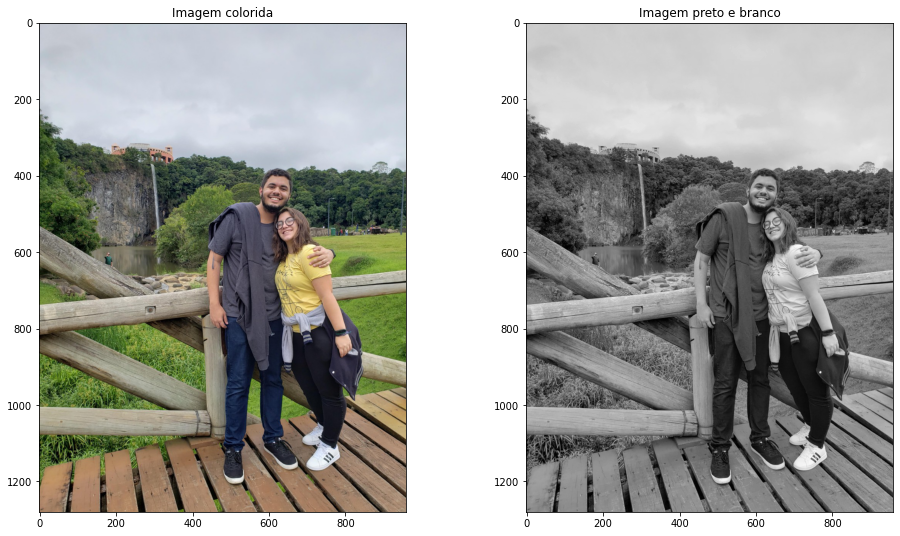

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

axes[0].set_title('Imagem colorida')
axes[0].imshow(img)

axes[1].set_title('Imagem preto e branco')
axes[1].imshow(bw_img, cmap='gray')

plt.show()

### Comprimindo imagens utilizando SVD

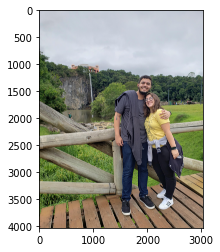

In [28]:
img = plt.imread('images/foto.jpg', 'jpg')
img = np.rot90(img, k=1, axes=(1,0))
plt.imshow(img)

In [131]:
%%time
U,S,V = np.linalg.svd(img)

CPU times: user 2min 19s, sys: 6.17 s, total: 2min 25s
Wall time: 38.1 s


In [132]:
k = min(img.shape)
k = 50

img_comp = U[:, : k]@np.diag(S)[: k, : k]@V[: k, :]

### Imagem original

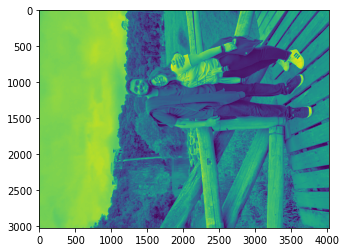

In [107]:
plt.imshow(img)

### Imagem comprimida

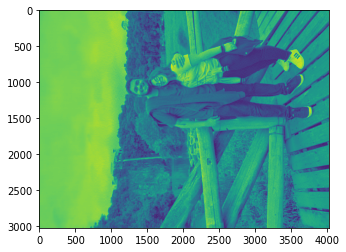

In [108]:
plt.imshow(img_comp)

## Testando compressão da imagem

In [109]:
matplotlib.image.imsave('svd_images/original.jpg', img)
matplotlib.image.imsave('svd_images/comprimido.jpg', img_comp)

In [110]:
original_size = os.stat('svd_images/original.jpg').st_size/1000
comp_size = os.stat('svd_images/comprimido.jpg').st_size/1000

print(f'Original: {original_size:.1f}kb | Comprimido: {comp_size:.1f}kb')

Original: 1243.1kb | Comprimido: 1061.8kb
